In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random5,

In [56]:
# Generate a signal for a damped harmonic oscillator, with some noise introduced -- assume underdamped
# SI Units:
# t in s
# x in m
# v_x in m/s
# m in kg
# b in N s / m
# k in N / m
def generate_signal(t_min = 0, t_max = 10, x_0 = 5, vx_0 = 3, m = 4, b = 4, k = 15, num_points = 1000):
    t = np.linspace(t_min, t_max, num_points) + np.random.normal(0, 0.1*(t_max-t_min)/num_points, num_points)
    gamma = b / (2*m)
    omega_0 = (k / m)**0.5
    omega_d = (omega_0**2 - gamma**2)**0.5
    C1 = x_0
    C2 = (vx_0 + gamma*x_0) / omega_d
    x = np.exp(-gamma*t) * (C1 * np.cos(omega_d*t) + C2 * np.sin(omega_d*t) ) + np.random.normal(0, x_0*0.01, num_points)
    return t, x

Text(0.5, 1.0, 'Sample data for an underdamped system')

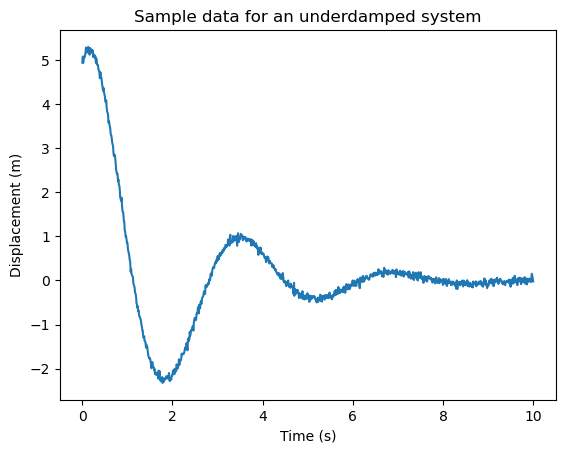

In [57]:
t, x = generate_signal()
plt.plot(t,x)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Sample data for an underdamped system")

In [75]:
data = pd.DataFrame(data = x, index = t)
data.columns = ["displacement"]
data.index.name = "time"
data

,displacement
time,
-0.000055,4.945913
0.010944,5.077873
0.019244,4.935859
0.029974,5.027446
0.039388,5.078890
...,...
9.959320,0.011253
9.968832,0.151640
9.980055,0.101860


In [76]:
data.to_csv("./damped_oscillator_data.csv")